In [146]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
path = "./logs/yolact_plus_resnet50_qualitex.log"
with open(path, "r") as j:
    data = j.readlines()

In [148]:
data[1]

'{"type": "train", "session": 0, "data": {"loss": {"B": 10.95907, "M": 4.37427, "C": 44.01644, "S": 11.69027, "T": 71.04005}, "epoch": 0, "iter": 0, "lr": 0.0001, "elapsed": 4.370086669921875}, "time": 1664359797.8159604}\n'

In [149]:
loss = []
time = []
ref = json.loads(data[1])["time"]
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "train" and line_dict["session"] > 4:
        loss.append(line_dict["data"]["loss"]["T"])
        time.append((line_dict["time"]-ref)/3600)

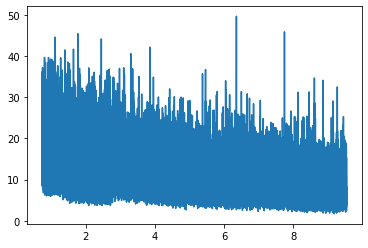

In [150]:
plt.plot(time,loss)
plt.show()

In [151]:
epoch = []
loss_val = []
loss_50 = []
loss_60 = []
loss_70 = []
loss_80 = []
loss_90 = []
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "val" and line_dict["session"]:
        loss_val.append(line_dict["data"]["mask"]["all"])
        loss_50.append(line_dict["data"]["mask"]["50"])
        loss_60.append(line_dict["data"]["mask"]["60"])
        loss_70.append(line_dict["data"]["mask"]["70"])
        loss_80.append(line_dict["data"]["mask"]["80"])
        loss_90.append(line_dict["data"]["mask"]["90"])
        epoch.append(line_dict["data"]["epoch"])

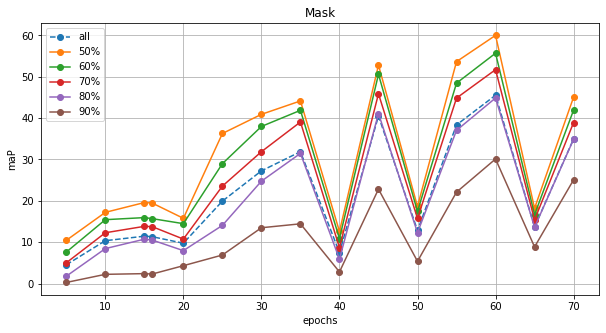

In [152]:
plt.figure(1, (10,5))
plt.plot(epoch, loss_val, "--o", label="all")
plt.plot(epoch, loss_50, "-o", label="50%")
plt.plot(epoch, loss_60, "-o", label="60%")
plt.plot(epoch, loss_70, "-o", label="70%")
plt.plot(epoch, loss_80, "-o", label="80%")
plt.plot(epoch, loss_90, "-o", label="90%")

plt.grid()
plt.legend()
plt.ylabel("maP")
plt.xlabel("epochs")
plt.title("Mask")
plt.show()

In [153]:
epoch = []
loss_val = []
loss_50 = []
loss_60 = []
loss_70 = []
loss_80 = []
loss_90 = []
for line in data:
    line_dict = json.loads(line)
    if line_dict["type"] == "val" and line_dict["session"]:
        loss_val.append(line_dict["data"]["box"]["all"])
        loss_50.append(line_dict["data"]["box"]["50"])
        loss_60.append(line_dict["data"]["box"]["60"])
        loss_70.append(line_dict["data"]["box"]["70"])
        loss_80.append(line_dict["data"]["box"]["80"])
        loss_90.append(line_dict["data"]["box"]["90"])
        epoch.append(line_dict["data"]["epoch"])

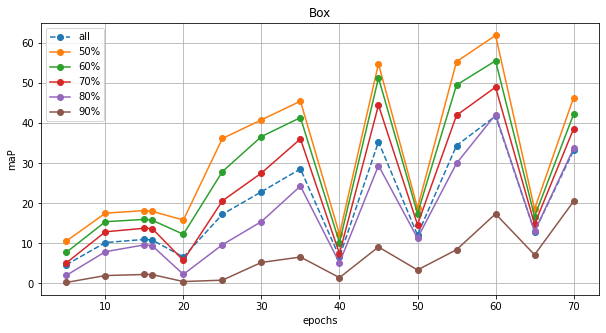

In [154]:
plt.figure(1, (10,5))
plt.plot(epoch, loss_val, "--o", label="all")
plt.plot(epoch, loss_50, "-o", label="50%")
plt.plot(epoch, loss_60, "-o", label="60%")
plt.plot(epoch, loss_70, "-o", label="70%")
plt.plot(epoch, loss_80, "-o", label="80%")
plt.plot(epoch, loss_90, "-o", label="90%")

plt.grid()
plt.legend()
plt.ylabel("maP")
plt.xlabel("epochs")
plt.title("Box")
plt.show()